# Save figures for publication

Author: Pia Rautenstrauch

Date: 2024-01-17

Abbreviation for Competition use case: CU_base 

## Requirements
- [x] Fontsize: > 7 - 12
- [x] Font type: Arial
- [x] Linewidth 0.25pt-1pt (defaults to 1)
- [x] dpi: 600


## Other modifications
- [x] random order of plotting of colors in umap (https://github.com/scverse/scanpy/issues/891)

Anaconda environment: scib_v1.0.1_min

On max006.


In [1]:
# Imports
import os
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import scib
import scanpy as sc
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import rc

During startup - Warning messages:
1: Setting LC_CTYPE failed, using "C" 
2: Setting LC_COLLATE failed, using "C" 
3: Setting LC_TIME failed, using "C" 
4: Setting LC_MESSAGES failed, using "C" 
5: Setting LC_MONETARY failed, using "C" 
6: Setting LC_PAPER failed, using "C" 
7: Setting LC_MEASUREMENT failed, using "C" 


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
scib.__version__

'1.0.1'

In [4]:
# From https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html
px = 1/plt.rcParams['figure.dpi']  # pixel in inches

In [5]:
sc.set_figure_params(dpi_save=600, dpi=100, transparent=True, format='png', fontsize=9, figsize=(200*px, 140*px))

In [6]:
plt.rcParams['figure.figsize']

[2.7777777777777777, 1.9444444444444444]

In [7]:
# overwrite scanpy/matplotlib default font: chose: Arial

In [8]:
# Need to remove chached fonts

In [9]:
! rm ~/.cache/matplotlib -rf

In [10]:
font_dirs = ["/home/prauten/miniconda3/envs/scib_v1.0.1_min/fonts"]  # The path to the custom font file.
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [11]:
# change font
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"

- added: embedding = sc.pp.subsample(embedding, fraction=1., copy=True)
- site color is fixed to colorblind friendly values


In [12]:
plt.rcParams['lines.markersize'] = 3.0

In [13]:
def plot_umaps(models):
    np.random.seed(61)

    # Collect computed scores, nested dict is simple to convert to pd.DataFrame
    for model in models:
        # Load data
        # This is actually adata not embedding - I load reference from BAVAE_ADT_sample_100 as I didn't apply any filtering etc. to the data (as opposed to MultiVI and neurips challenge winning model)
        embedding =  ad.read_h5ad("./../Models/BAVAE_ADT_sample_100_seed_0/adata.h5ad".format(model))

        # Read embeddings
        low_dimensional = ad.read_h5ad("./../Predictions/{}.prediction.h5ad".format(model))
        embedding.obsm['embedding'] = low_dimensional.X.copy()
        embedding.obsm['X_emb'] = low_dimensional.X.copy()

        # Compute neighbors 
        sc.pp.neighbors(embedding, use_rep='X_emb')
        sc.tl.umap(embedding)

        # Load metadata (cell type information)
        solution = ad.read_h5ad("./../../../data/original/neurips_competition/openproblems_bmmc_cite_phase2/openproblems_bmmc_cite_phase2.censor_dataset.output_solution.h5ad")

        # Make sure order is the same as for the embedding
        solution = solution[embedding.obs.index,:].copy()

        # Transfer batch information and cell type labels to embedding
        embedding.obs['sample'] = solution.obs['batch']
        embedding.obs['site'] = solution.obs['batch'].apply(lambda x: x.split("d")[0])
        embedding.obs['donor'] = solution.obs['batch'].apply(lambda x: x.split("d")[1])

        # make sure these variables are categorical
        embedding.obs['sample'] = embedding.obs['sample'].astype('category')
        embedding.obs['site'] = embedding.obs['site'].astype('category')
        embedding.obs['donor'] = embedding.obs['donor'].astype('category')

        # make sure these cell type is categorical
        embedding.obs['cell type'] = embedding.obs['cell type'].astype('category')

        # use colorblind friendly colors for site
        embedding.uns['site_colors'] = ['#0173b2', '#de8f05', '#029e73', '#d55e00']

        embedding = sc.pp.subsample(embedding, fraction=1., copy=True)

        ### Save UMAP visualization as png 
        sc.pl.umap(
            embedding,
            color=['cell type', 'sample', 'site'],
            size=1,
            frameon=False,
            ncols=1,
            wspace=-0.2,
            save="_{}_CU_base_CITE.png".format(model),
            legend_loc=None,
            title=['','','']
            #legend_fontsize='x-small'
        )

    ### Save UMAP visualization as png 
    sc.pl.umap(
            embedding,
            color=['cell type', 'sample', 'site'],
            size=1,
            frameon=False,
            ncols=1,
            wspace=-0.2,
            save="_{}_CU_base_CITE_legend.png".format(model),
            legend_fontsize='x-small',
            title=['','','']
    )


In [14]:
# List of identifiers of trained models
models = ['BAVAE_ADT_sample_100_seed_0', 'totalVI_seed_0',  'Winner_CITE_online_seed_0']


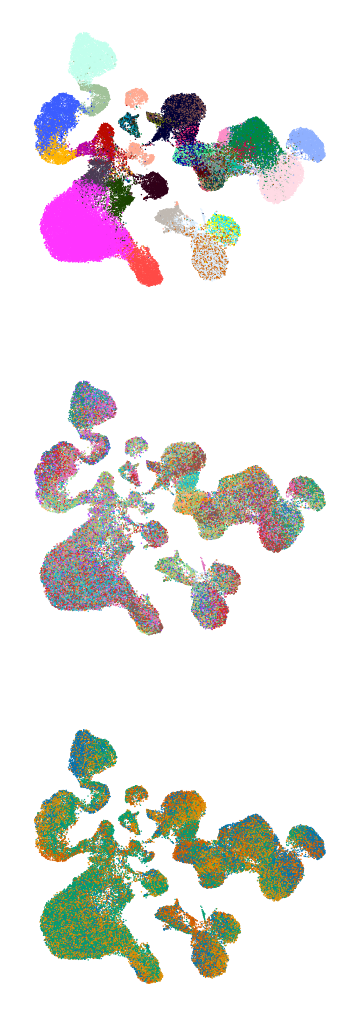

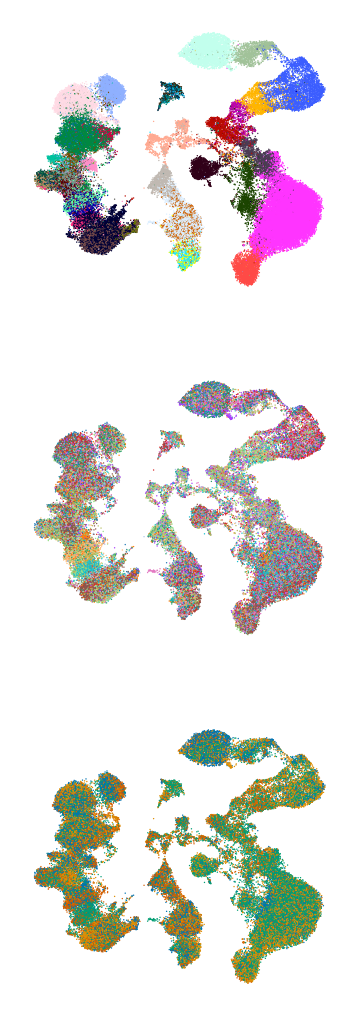

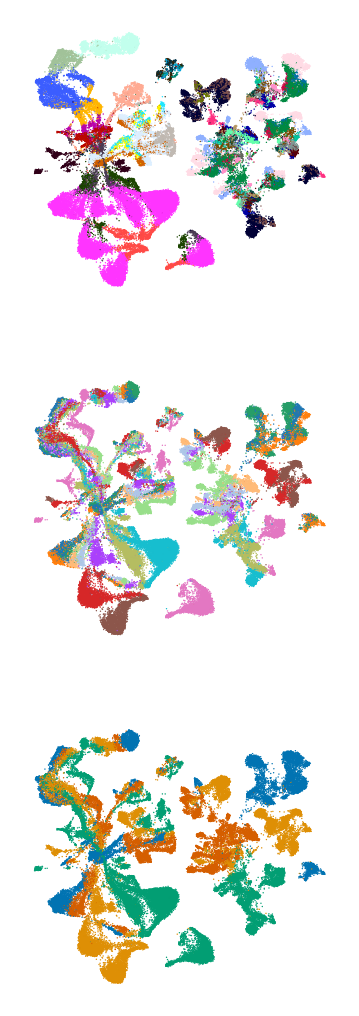

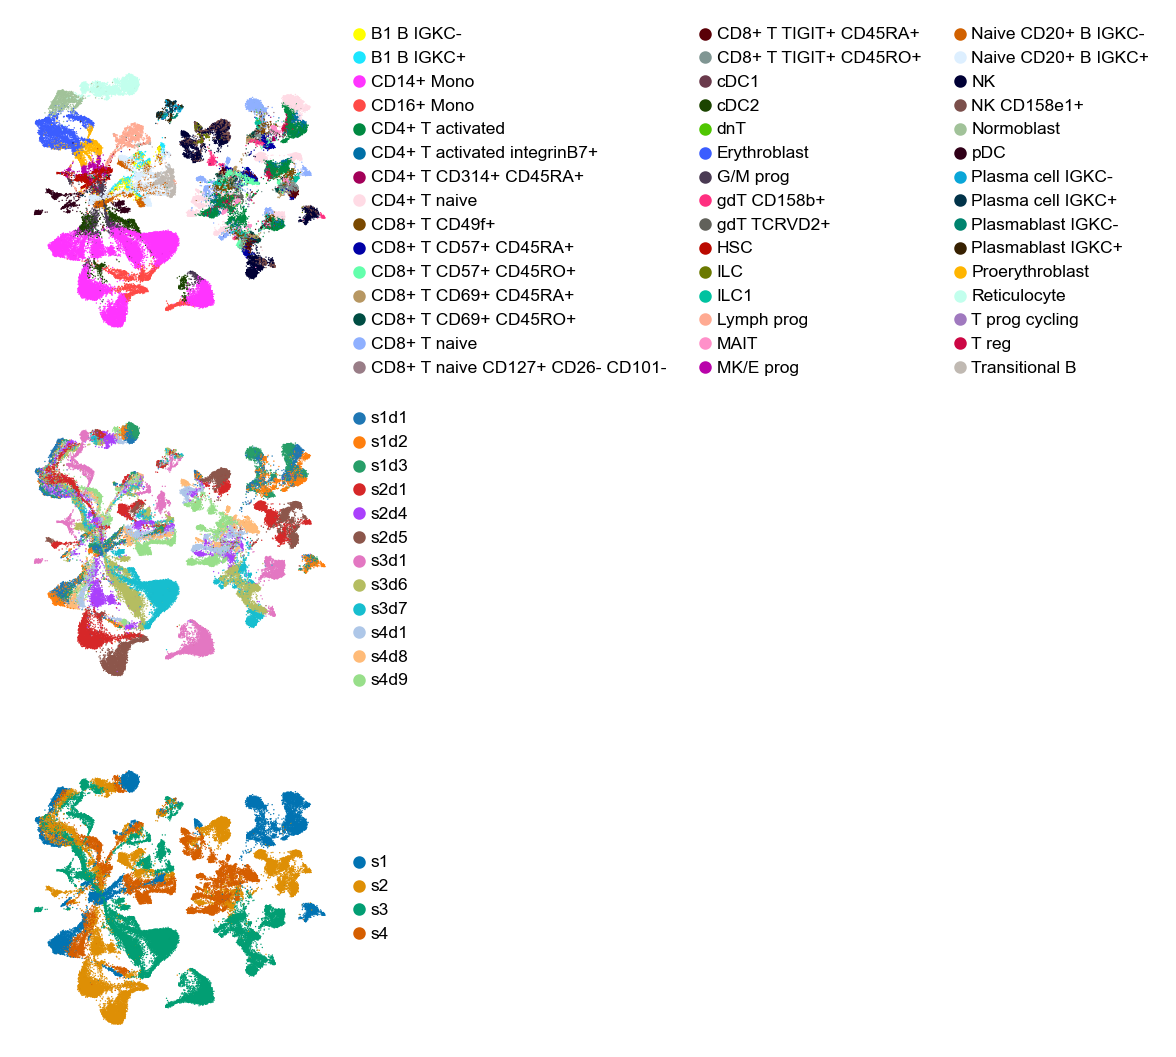

In [15]:
plot_umaps(models)

In [16]:
# RNA and ADT only

In [17]:
# List of identifiers of trained models
models = ['BAVAE_ADT_sample_100_rna_only_seed_0_20dims',  'BAVAE_ADT_sample_100_adt_only_seed_0_20dims']

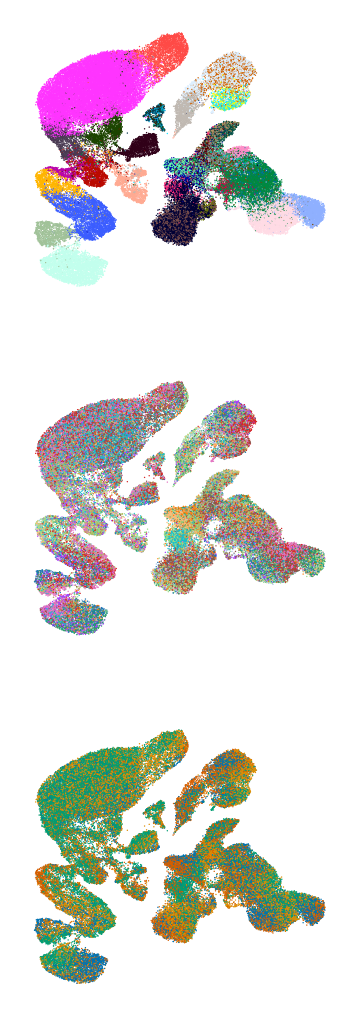

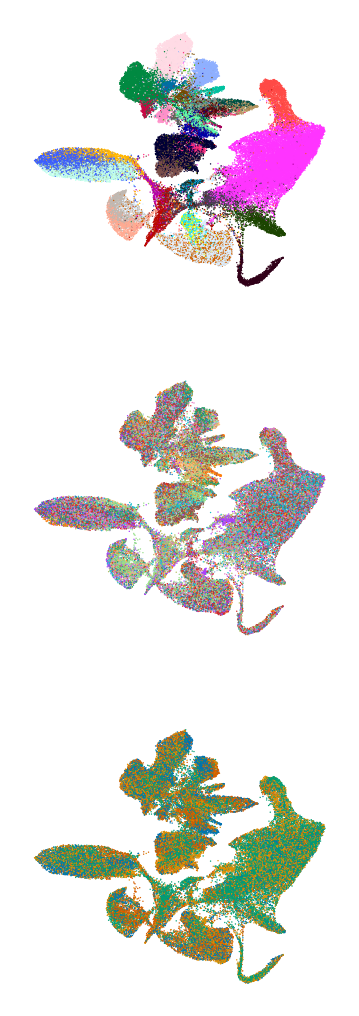

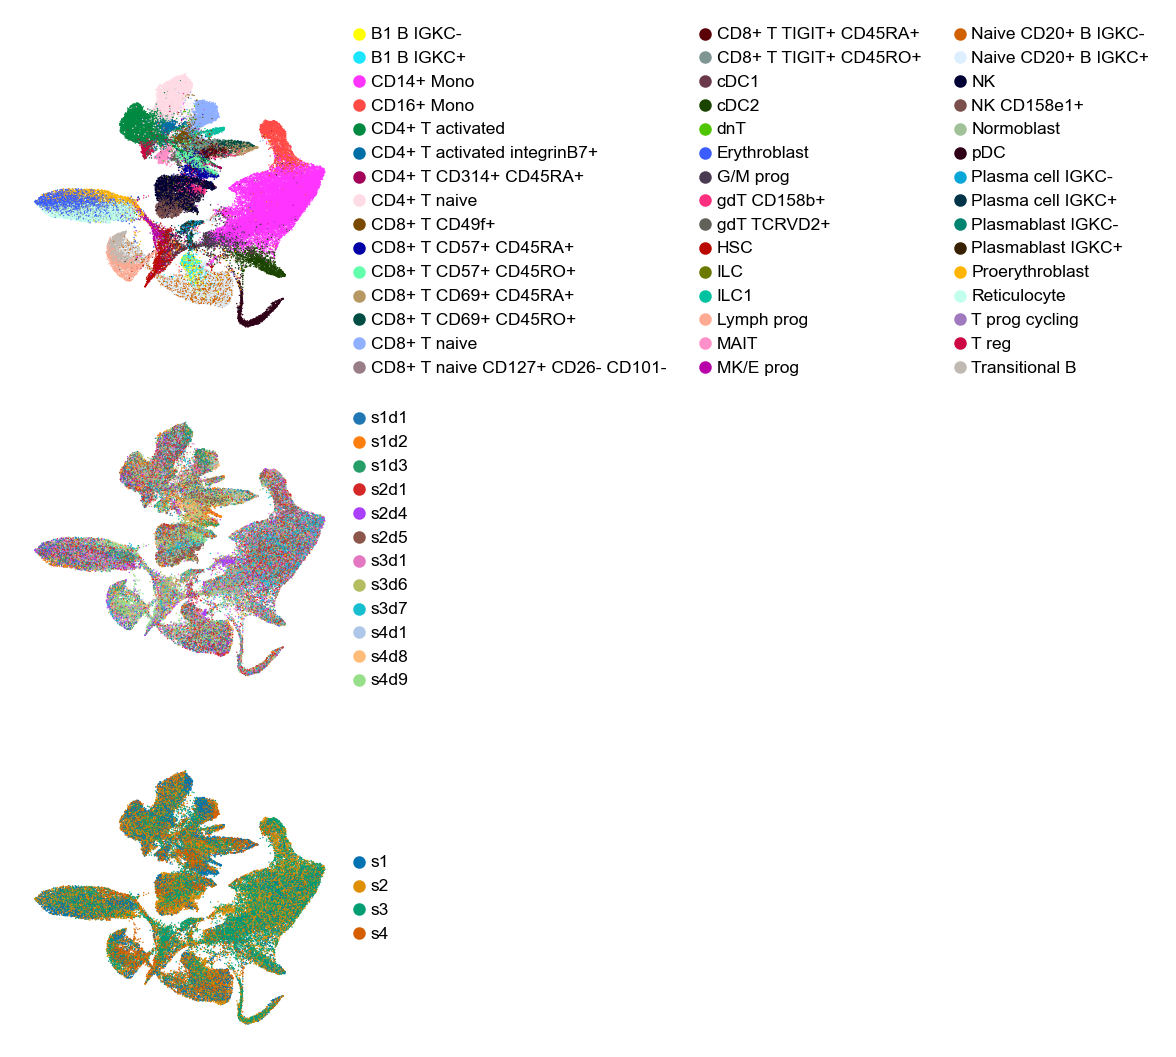

In [18]:
plot_umaps(models)